## 4.1 선형 회귀


ｙ  = Θ0 + Θ1 * x1 + Θ2 * x2 + ... + Θn * xn

MSE(X, hΘ) = (1/m) * ∑(ΘT * x(i) - y(i))^2



In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os



---
정규 방정식

In [2]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

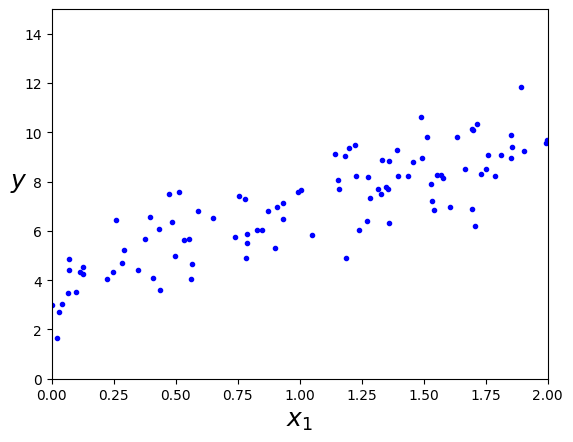

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


Θ = (X^T X) ^-1 X^T y

In [8]:
# np.c : 두개의 행렬을 옆으로 이어주는 기능
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.88385015],
       [3.00201079]])

Θ0 = 4.15 , Θ1 = 2.87

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict


array([[3.88385015],
       [9.88787174]])

 Θ0 + 0 * Θ1 = 4.1561

 Θ0 + 2 * Θ1 = 9.91

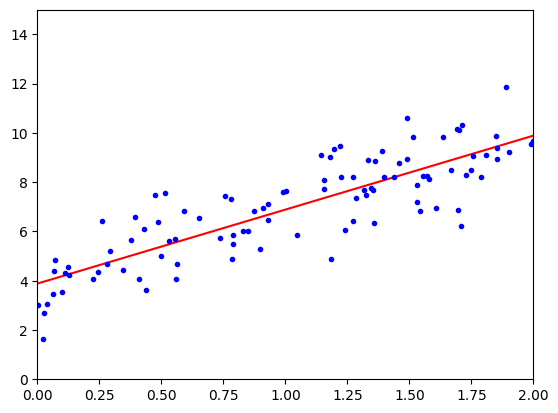

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

사이킷런에서의 선형회귀

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # 절편 , 기울기

(array([3.88385015]), array([[3.00201079]]))

In [12]:
lin_reg.predict(X_new)

array([[3.88385015],
       [9.88787174]])

In [13]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.88385015],
       [3.00201079]])

In [14]:
# pinv <- 유사 역행렬 : 역행렬을 구할 수 없을때 최소 제곱법으로 구하는 것
np.linalg.pinv(X_b).dot(y)

array([[3.88385015],
       [3.00201079]])

---
## 경사 하강법

배치 경사 하강법

In [15]:
# 배치 경사 하강법
# 매 스텝에서 훈련 데이터 전체를 사용. 큰 훈련 세트에서 매우 느리지만 특성 수에 민감하진 않음

eta = 0.1  # 학습률
n_iterations = 1000
m = 100 # 훈련 데이터 개수

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.88385015],
       [3.00201079]])

In [ ]:
X_new_b.dot(theta)

array([[ 3.88961092],
       [10.10015912]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

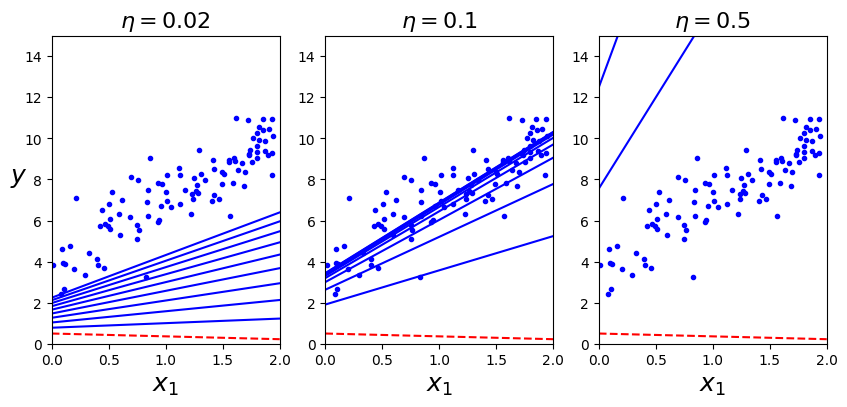

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

#save_fig("gradient_descent_plot")
plt.show()

---
확률 경사 하강법

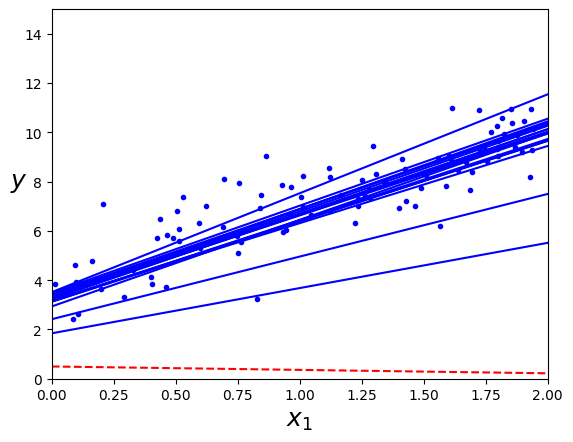

In [ ]:
# 확률적 경사 하강법 (SGD)
# 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘프에 대한 그레디언트를 계산
# 훨씬 빠르지만 불안
# 지역 최소값에서 탈출시켜주지만 전역 최소값에 다다르지 못함 -> 학습률을 점진적으로 감소시키는 방식


theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
#save_fig("sgd_plot")                                 # 책에는 없음
plt.show()                                           # 책에는 없음

In [ ]:
theta

array([[3.95576178],
       [3.10779885]])

In [ ]:
# 사이킷런에서의 SGD

# 1000번 반복, 손실이 0.001보다 작아질 때까지 진행, 학습률 0.1
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.8936554]), array([3.15485595]))

---
미니배치 경사 하강법

In [ ]:
# 미니배치 경사 하강법

# 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
# 행렬 연산에 최적화. GPU를 사용해 성능 향상
# 미니 배치를 어느정도 크게 하면 SGD보다 덜 불규칙하게 움직이지만, 지역 최소값에서 빠져나오기는 더 힘들 수도

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)


theta

array([[3.93458717],
       [3.1388011 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

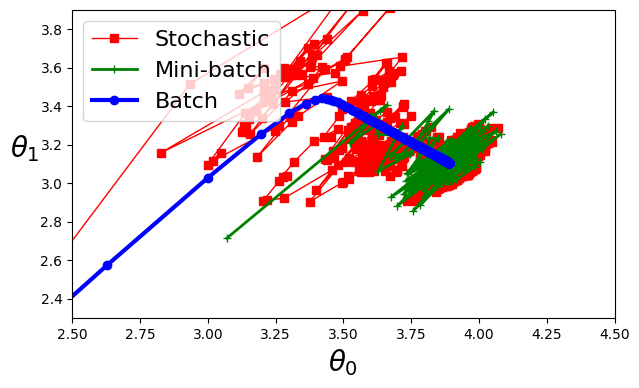

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

---
## 4.3 다항 회귀

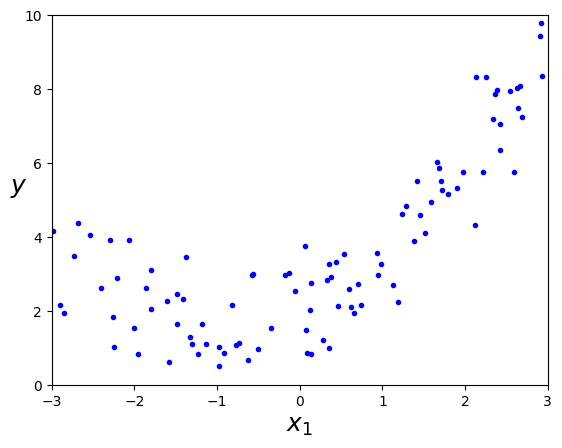

In [ ]:
# 데이터가 직선보다 복잡한 형태일 경우
# 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터 셋에 선형 모델을 훈련

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# interaction_only = True 지정시 거듭제곱이 포함된 항은 모두 제외
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [ ]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [ ]:
poly_features.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# 0.5x^2 + x + 2 + a -> 0.4989x^2 + x + 2 + a

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

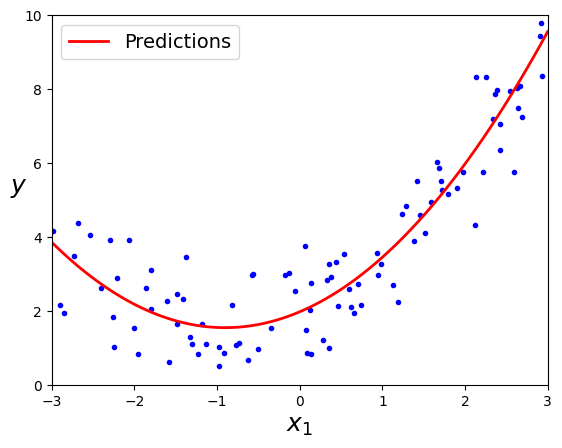

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

---
## 4.4 학습 곡선

In [ ]:
# 훈련데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 : 과대적합
# 양쪽 모두 좋지 못하면 : 과소 적합

# 학습곡선 : 훈련세트와 검증세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
# 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    # m을 1부터 X_train의 크기까지 1씩 늘림
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

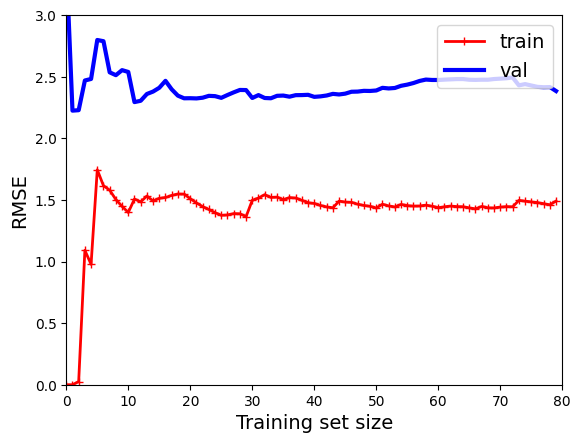

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

과소적합의 전형적인 모슴. 두 곡선이 수평한 공간을 만들고 꽤 높은 오차에서 매우 가까이 근접

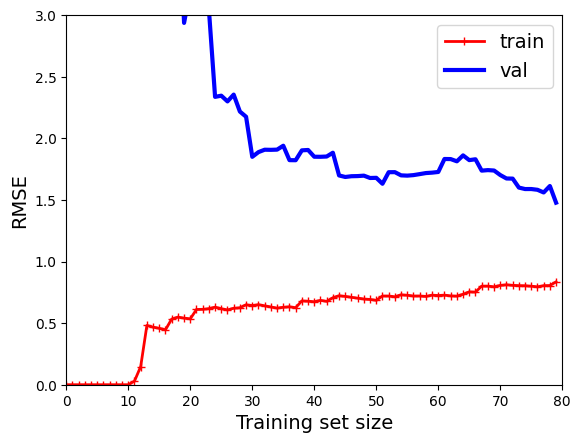

In [ ]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

선형 회귀 모델 보다 오차가 훨씬 낮지만 두 곡선 사이에 공간이 있다
이는 훈련 데이터에서의 성능이 검증 데이터보다 훨씬 낫다는 것이고, 과대적합의 특징이다.

과대적합 모델을 개선하는 한 가지 방법은 검증 오차와 훈련 오차가 근접할 때까지 더 많은 훈련데이터를 추가하는 것이다.

편향 : 잘못된 가정을 인한 것. EX) 데이터가 2차인데 선형으로 가정. 과소적합되기 쉬움

분산 : 데이터에 있는 작은 변동에 모델이 과도하게 민감히 반응. 고차 다항 회귀 모델등이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.

---
## 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델의 규제 -> 다항식의 차수를 감소

선형회귀모델 에서는 모델의 가중치를 제한 : 릿지 회귀, 라쏘 회귀, 엘라스틱넷

---
릿지 회귀(티호노프 규제)

J(Θ) = MSE(Θ) + 0.5 * α * (∑(Θi^2))

In [ ]:
# 규제항이 비용 함수에 추가됨 (훈련하는 동안에만).
# 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

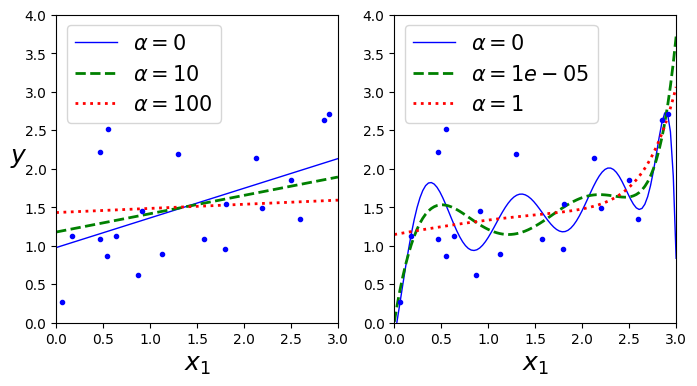

In [ ]:
# α의 변화에 따른 그래프의 변화

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
# 1행 2열 중 첫번째
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

α가 커질 수록 직선에 가까워지지며 분산은 줄어들고 편향은 커짐

In [ ]:
# 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
# sag = Stochastic Average Gradient
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

In [ ]:
# 확률적 경사 하강법 (SGD) 사용
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

---
라쏘 회귀

선형회귀의 또 다른 규제된 버전

릿지 회귀처럼 비용함수에 규제항을 더하지만 l2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1노름을 사용

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


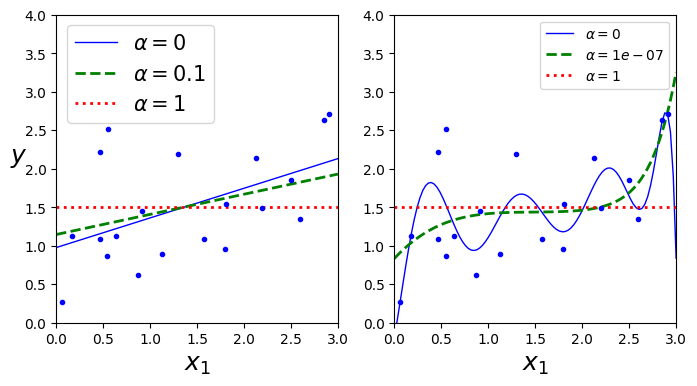

In [ ]:
# 위의 릿지 모델 대신 라쏘 모델을 사용했고 α가 좀더 작아짐
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.legend()
plt.show()

In [ ]:
# 라쏘 클래스를 활용한 사이킷런

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

---
엘라스틱넷

릿지 회귀와 라쏘 회귀를 절충한 모델

규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하고, 혼합 정도는 혼합비율 r을 사용해 조절한다.

r=0이면 릿지 회귀와 같고 r=1이면 라쏘 회귀와 같다

In [ ]:
# 사이킷런의 엘라스틱넷

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

어떤 것을 사용할까?

릿지가 기본이 되지면 쓰이는 특성이 몇개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.

특성 수가 훈련 샘플 수보다 많거나 특성 몇개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷이 더 낫다

---
조기 종료

검증에러가 최솟값에 도달하면 바로 훈련을 중지시기키는 것

감소되던 검증 에러가 멈추다가 다시 상승하는 것은 모델이 훈련데이터에 과대적합되기 시작했다는 뜻.

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
# from copy import deepcopy

# poly_scaler = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
#         ("std_scaler", StandardScaler())
#     ])

# X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# X_val_poly_scaled = poly_scaler.transform(X_val)

# sgd_reg = SGDRegressor(max_iter=1, tol=1e18, warm_start=True,
#                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val, y_val_predict)
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = deepcopy(sgd_reg)

In [ ]:
# sgd_reg = SGDRegressor(max_iter=1, tol=1e18, warm_start=True,
#                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# n_epochs = 500
# train_errors, val_errors = [], []
# for epoch in range(n_epochs):
#     sgd_reg.fit(X_train_poly_scaled, y_train)
#     y_train_predict = sgd_reg.predict(X_train_poly_scaled)
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     train_errors.append(mean_squared_error(y_train, y_train_predict))
#     val_errors.append(mean_squared_error(y_val, y_val_predict))

# best_epoch = np.argmin(val_errors)
# best_val_rmse = np.sqrt(val_errors[best_epoch])

# plt.annotate('Best model',
#              xy=(best_epoch, best_val_rmse),
#              xytext=(best_epoch, best_val_rmse + 1),
#              ha="center",
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=16,
#             )

# best_val_rmse -= 0.03  # just to make the graph look better
# plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
# plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
# plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
# plt.legend(loc="upper right", fontsize=14)
# plt.xlabel("Epoch", fontsize=14)
# plt.ylabel("RMSE", fontsize=14)

# plt.show()

---
## 4.6 로지스틱 회귀

샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용

추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함 ( 이진 분류기)

---
확률 추정

로지스틱 회귀모델은 입력 특성의 가중치 합을 계산.

대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력

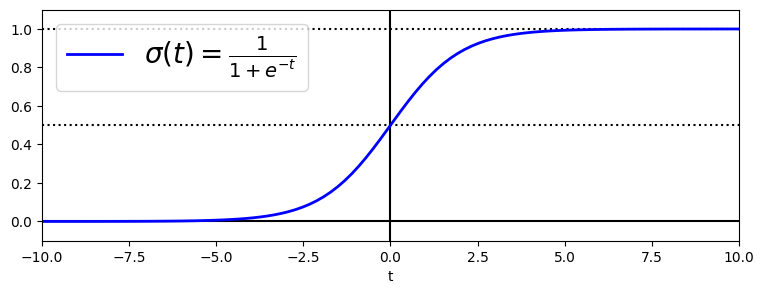

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

---
결정 경계

In [ ]:
# 3개의 품종에 속하는 붓꽃 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있음
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris["target"][:5]

array([0, 0, 0, 0, 0])

In [ ]:
iris["target_names"][:5]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

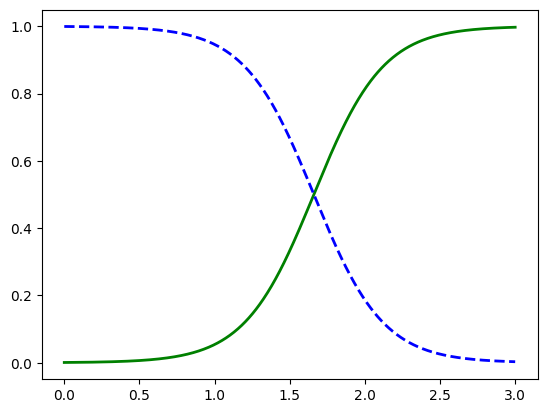

In [ ]:
# 꽃잎 너비가 0~3cm 인 꽃들에 대한 예측
import numpy as np
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

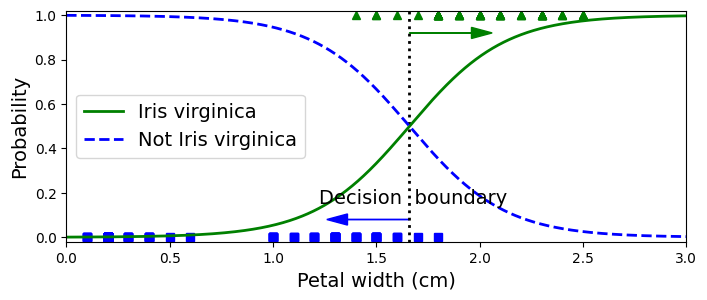

In [ ]:
# 그래프 좀 더 보기 좋게 꾸미기
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])
#1.7은 Iris-Verginica라고 예측하고, 1.5는 아니라고 예측

array([1, 0])

---
소프트맥스 회귀

여러개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원. 다항 로지스틱 회귀 라고도 함

샘플 x가 주어지면 각 클래스 k에 대한 점수 sk(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정

소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측하기 때문에 상호 베타적인 클래스에서만 사용해야 한다. 하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없다.

In [ ]:
# 소프트맥스 회귀를 사용해 붓꽃을 세개의 클래스로 분류

X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

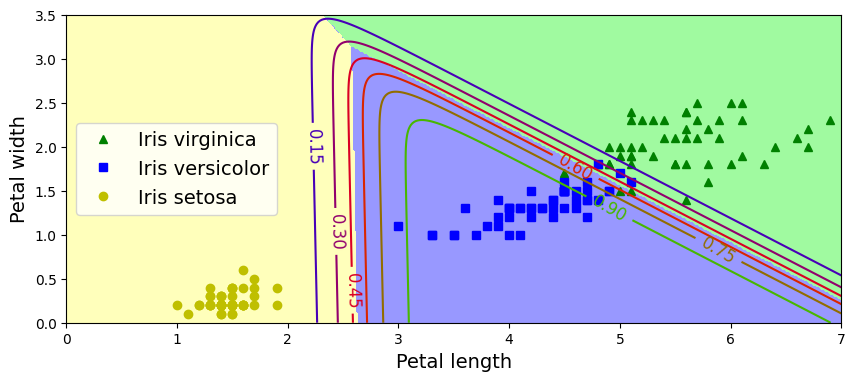

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# 예측 확률, 예측 클라스
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#ffffbb','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]]) #2클래스에 속할 확률이 제일 높음

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

---
# 연습문제

12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [ ]:
np.random.seed(2042)

In [ ]:
# 훈련, 검증, 테스트 세트 나누기
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
# 클래스 인덱스를 원 - 핫 벡터로 바꾸는 함수
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [ ]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [ ]:
# softmax 함수
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [ ]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

In [ ]:
# 학습률, epoch, 샘플 수, 0으로 나누기 오류 방
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [ ]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [ ]:
# 검증 세트에 대한 예측과 정확도
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [ ]:
# l2 규제를 추가
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        # 신규
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    # 변경
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [ ]:
# 예측과 정확도
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [ ]:
# 조기 종료 추가
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 1.3755884956240954
500 0.5627674606315182
1000 0.540714832025482
1500 0.5347656233599178
2000 0.5329764591321045
2500 0.5325609042775666
2660 0.5325449034479101
2661 0.5325449042485811 조기 종료!


In [ ]:
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

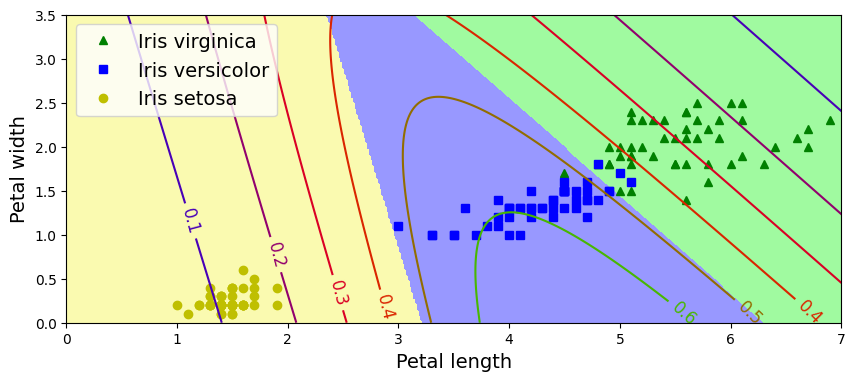

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
# 테스트 케이스에 대한 예측 및 평가
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333